<a href="https://colab.research.google.com/github/rosebaekfany/Machine-Learning/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Maleki

**Student ID**: 400110009





## Importing Libraries

First we import libraries that we need for this assignment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
X, Y = None, None

### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

Avoiding feature dominance: Features in the dataset may have different scales, ranges, or units. If there is a significant difference in the magnitudes of different features, it can lead to certain features dominating the learning process. This dominance can result in biased weight updates during training, where features with larger magnitudes have a greater impact on the model than others. Normalization helps to balance the influence of different features and prevents one feature from overpowering the others.

Improving convergence: Many machine learning algorithms use optimization techniques that rely on gradient-based optimization. Normalizing the data helps in achieving faster convergence during the training process. It ensures that the optimization algorithm can converge quickly and efficiently by avoiding oscillations or getting stuck in local optima.

Handling different units: In datasets where features have different units (e.g., dollars, kilograms, percentages), normalization brings all the features to a standardized scale. This ensures that the model treats all features equally and removes any bias introduced by the choice of units.

Robustness to outliers: Normalization can also help in dealing with outliers or extreme values in the dataset. By scaling the features, outliers have less impact on the overall distribution, making the model more robust to such extreme values.

In [ ]:
### START CODE HERE ###
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Normalize X
X_norm = (X - mean) / std

# Normalize Y
Y_norm = (Y - np.mean(Y)) / np.std(Y)

print(X_norm.shape)
print(Y_norm.shape)
### END CODE HERE ###

(10000, 3)
(10000,)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
### START CODE HERE ###
X= np.column_stack((np.ones((X_norm.shape[0], 1)), X_norm))
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###

    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###

### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    reg_term = (regLambda / 2) * np.sum(theta[1:]**2)
    cost = (1 / m) * loss + reg_term
    ### END CODE HERE ###
    return cost

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{{\partial J(\theta)}}{{\partial \theta _j}} = \frac{1}{m} \sum_{i=1}^{n} \left( (h_\theta(\mathbf{x}^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \right) + \frac{{\text{{regLambda}}}}{{m}} \cdot \theta _j
$$

In [ ]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (h - y))
    grad[1:] += (regLambda / m) * theta[1:]
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
def fit(X, y, regLambda=0.01, alpha=0.01, epsilon=1e-4, maxNumIters=100):
    '''
    Trains the model
    Arguments:
        X: n-by-d numpy matrix
        y: n-dimensional numpy vector
        regLambda: scalar regularization constant
        alpha: gradient descent learning rate
        epsilon: convergence rate
        maxNumIters: maximum number of gradient descent iterations
    Returns:
        The learned theta parameters and the loss history
    '''
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for i in range(maxNumIters):
        grad = computeGradient(theta, X, y, regLambda)
        theta -= alpha * grad
        cost = computeCost(theta, X, y, regLambda)
        loss_history.append(cost)
        if i > 0 and np.linalg.norm(theta - theta_prev) <= epsilon:
            break

        theta_prev = theta.copy()

    return theta, loss_history

def hasConverged(theta_old, theta_new, epsilon):
    '''
    Returns if the theta has converged or not
    Arguments:
        theta_old: theta calculated in the previous iteration
        theta_new: theta calculated in the current iteration
        epsilon: convergence rate
    Returns:
        True if the theta has converged, False otherwise
    '''
    return np.linalg.norm(theta_new - theta_old) <= epsilon

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [ ]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
print("Loss history:")
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: {loss}")

print("Final theta:", theta)
### END CODE HERE ###

Loss history:
Iteration 1: 0.691486974579138
Iteration 2: 0.689835270182226
Iteration 3: 0.688192023963444
Iteration 4: 0.6865571925617295
Iteration 5: 0.6849307326645779
Iteration 6: 0.6833126010118343
Iteration 7: 0.6817027543994215
Iteration 8: 0.680101149683006
Iteration 9: 0.6785077437815997
Iteration 10: 0.6769224936810995
Iteration 11: 0.6753453564377617
Iteration 12: 0.6737762891816156
Iteration 13: 0.6722152491198126
Iteration 14: 0.6706621935399111
Iteration 15: 0.6691170798131005
Iteration 16: 0.6675798653973612
Iteration 17: 0.6660505078405617
Iteration 18: 0.6645289647834939
Iteration 19: 0.6630151939628446
Iteration 20: 0.6615091532141066
Iteration 21: 0.6600108004744274
Iteration 22: 0.6585200937853947
Iteration 23: 0.6570369912957633
Iteration 24: 0.655561451264119
Iteration 25: 0.6540934320614824
Iteration 26: 0.6526328921738526
Iteration 27: 0.6511797902046905
Iteration 28: 0.6497340848773433
Iteration 29: 0.648295735037409
Iteration 30: 0.6468646996550429
Iteration 3

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.33, random_state=42)
### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    Y = None
    ### START CODE HERE ###
    h_theta = sigmoid(np.dot(X, theta))
    Y = (h_theta > 0.5).astype(int)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: The lower the lerning rate and regularization constant, the chance of converging is higer.

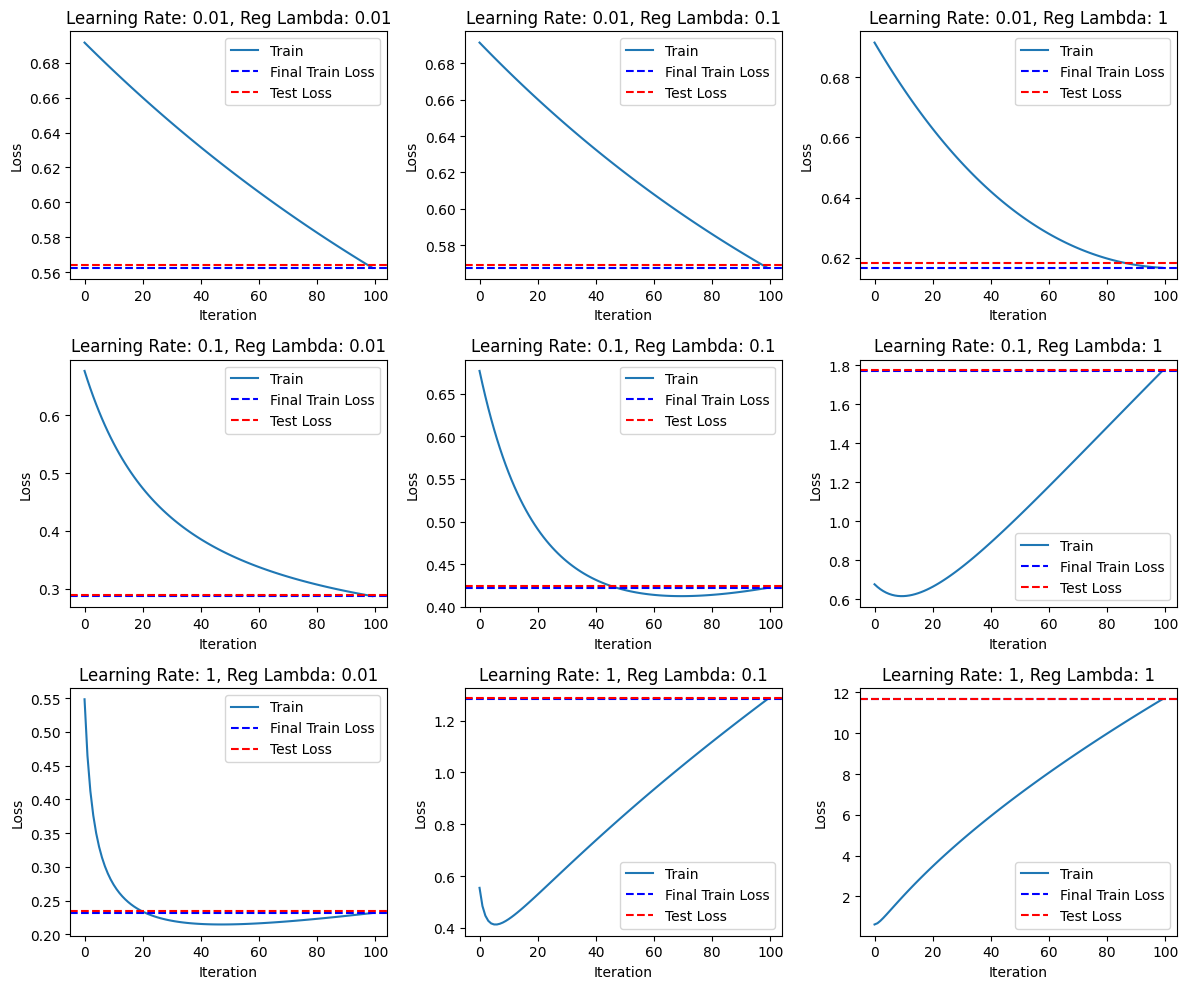

In [ ]:
### START CODE HERE ###
learning_rates = [0.01, 0.1, 1]
regularization_constants = [0.01, 0.1, 1]

fig, axs = plt.subplots(len(learning_rates), len(regularization_constants), figsize=(12, 10))

for i, learning_rate in enumerate(learning_rates):
    for j, reg_lambda in enumerate(regularization_constants):

        theta, loss_history_train = fit(X_train, Y_train, regLambda=reg_lambda, alpha=learning_rate)


        Y_pred_train = predict(X_train, theta)
        Y_pred_test = predict(X_test, theta)

        loss_train = computeCost(theta, X_train, Y_train, reg_lambda)
        loss_test = computeCost(theta, X_test, Y_test, reg_lambda)

        axs[i, j].plot(loss_history_train, label='Train')
        axs[i, j].axhline(loss_train, linestyle='--', color='blue', label='Final Train Loss')
        axs[i, j].axhline(loss_test, linestyle='--', color='red', label='Test Loss')
        axs[i, j].set_xlabel('Iteration')
        axs[i, j].set_ylabel('Loss')
        axs[i, j].set_title(f'Learning Rate: {learning_rate}, Reg Lambda: {reg_lambda}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.928

In [ ]:
### START CODE HERE ###
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on the test set:", accuracy)
### END CODE HERE ###

Accuracy on the test set: 0.9282828282828283


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.985

In [ ]:
### START CODE HERE ###
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on the test set:", accuracy)
### END CODE HERE ###

Accuracy on the test set: 0.9848484848484849


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: LDA-0.985